In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import scqubits
import numpy as np
from src.utilities import L_to_El, El_to_L, Ec_to_C

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
1/np.sqrt(5.1e-9 * 29e-15)/2/np.pi / 1e9

13.08687772403293

In [ ]:
scqubits.GUI()

Container(children=[Sheet(children=[Card(children=[Img(layout=None, src='data:image/png;base64,iVBORw0KGgoAAAA…

In [60]:
import scqubits as scq
# EJ_opt = 4.3515
# EC_opt = 3.0248
# EL_opt = 0.1283

fluxonium = scq.Fluxonium(
    EJ=EJ_opt,
    EC=EC_opt,
    EL=EL_opt,
    cutoff=100,
    flux=0.5
)

In [61]:
spectrum =fluxonium.get_spectrum_vs_paramvals(param_name='flux',param_vals=np.linspace(0,1,100))

In [64]:
import matplotlib.pyplot as plt
flux_array = np.linspace(0,1,100)
spectrum =fluxonium.get_spectrum_vs_paramvals(param_name='flux',param_vals=flux_array, evals_count=8)
idx = 0

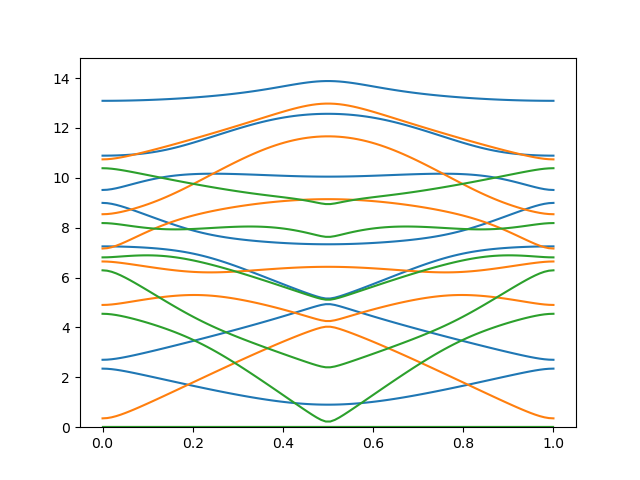

In [65]:
idx = 0
transition_idx = spectrum.energy_table - spectrum.energy_table[:,0][:,np.newaxis]
transition_idx1 = spectrum.energy_table - spectrum.energy_table[:,1][:,np.newaxis]
transition_idx2 = spectrum.energy_table - spectrum.energy_table[:,2][:,np.newaxis]

%matplotlib widget
fig, ax = plt.subplots(1,1)
ax.plot(flux_array, transition_idx, color="C0")
ax.plot(flux_array, transition_idx1, color= "C1")
ax.plot(flux_array, transition_idx2, color= "C2")
ax.set_ylim(bottom=0)
plt.show()

In [75]:
El_to_L(126e6)*1e6

1.2973135937046127

In [59]:
import numpy as np
from scipy.optimize import differential_evolution
import scqubits as scq

zero_voltage = 0.306
voltage_period = 0.8

# Datos de las transiciones deseadas (en GHz)
transitions_target = {
    0.0: [2.3654, 2.7],    # Flux = 0
    (0.2 - zero_voltage)/voltage_period : [1.936, 3.145],  # Voltage = 0.45
    (-0.0429 - zero_voltage)/voltage_period : [0.9553, 4.6354],  # Voltage = 0.45
    # 0.5: [None, None, 3.744]  # Flux = 0.5 (transición 1->3)
}

# Definimos la función de costo
def cost_function(params):
    EJ, EC, EL = params
    cost = 0.0
    for flux, transitions in transitions_target.items():
        fluxonium = scq.Fluxonium(
            EJ=EJ,
            EC=EC,
            EL=EL,
            cutoff=100,
            flux=flux
        )
        energies = fluxonium.eigenvals()  # Calcula los autovalores

        # Calcula las frecuencias de transición (en GHz)
        if transitions[0] is not None and transitions[1] is not None:
            freq_01 = energies[1] - energies[0]
            freq_02 = energies[2] - energies[0]
            # Suma los cuadrados de las diferencias para las transiciones 0->1 y 0->2
            cost += (freq_01 - transitions[0])**2 + (freq_02 - transitions[1])**2

        # Verifica si hay una transición adicional especificada (1->3)
        if len(transitions) > 2 and transitions[2] is not None:
            freq_13 = energies[3] - energies[1]
            cost += (freq_13 - transitions[2])**2

    return cost

# Límites para los parámetros (EJ, EC, EL deben ser positivos)
bounds = [(1, 15.0), (1, 10.0), (0.05, 0.3)]

# Realizamos la optimización con differential_evolution
result = differential_evolution(
    cost_function,
    bounds,
    strategy='best1bin',  # Estrategia de evolución diferencial
    maxiter=1000,         # Número máximo de iteraciones
    popsize=15,           # Tamaño de la población
    tol=1e-6,             # Tolerancia para la convergencia
    mutation=(0.5, 1),    # Factores de mutación
    recombination=0.7,    # Probabilidad de recombinación
    seed=42,              # Semilla para reproducibilidad
)

# Obtenemos los parámetros óptimos
EJ_opt, EC_opt, EL_opt = result.x

print(f"Parámetros óptimos encontrados:")
print(f"EJ = {EJ_opt:.4f} GHz")
print(f"EC = {EC_opt:.4f} GHz")
print(f"EL = {EL_opt:.4f} GHz")

Parámetros óptimos encontrados:
EJ = 4.5588 GHz
EC = 3.2091 GHz
EL = 0.1263 GHz


In [71]:
Ec_to_C(3.21e9)

6.034339353476363e-15

In [56]:
fluxonium = scq.Fluxonium(
    EJ=EJ_opt,
    EC=EC_opt,
    EL=EL_opt,
    cutoff=100,
    flux=0
)

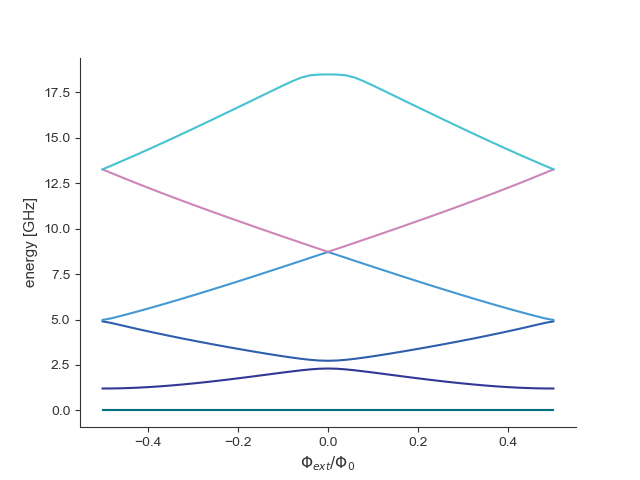

In [57]:
fig, ax = fluxonium.plot_evals_vs_paramvals(
    param_name='flux',
    param_vals=np.linspace(-0.5,0.5,51),
    evals_count=6,
    subtract_ground=True
)

In [3]:
JJA_area = (482*122 + 492*115)/(318**2)/2
JJA_area

0.5705074957477948

In [52]:
L_to_El(5*17.6e-9)*1e-9

1.8575171909861503

In [4]:
small_JJ_area = 0.18*0.18
JJA_area = (482*122 + 492*115)/(318**2)/2

JJA_area/small_JJ_area


17.608256041598604